# Data of Alphabet Inc. (GOOG) stock
This data set contains information about Alphabet Inc. share prices. In this example, I will make predictions of values using linear regression.

In [130]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

* Loading Data of Alphabet Inc. (GOOG) stock - Historical Data

In [131]:
google = web.DataReader('GOOG', data_source = 'yahoo', start = '1/1/2010', end = '1/1/2022') # loading data
google = google.drop('Volume', axis = 1) # deleting column Vol
google.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2010-01-04,15.678981,15.547723,15.615220,15.610239,15.610239
2010-01-05,15.637387,15.480475,15.620949,15.541497,15.541497
2010-01-06,15.588072,15.102393,15.588072,15.149715,15.149715
2010-01-07,15.193053,14.760922,15.178109,14.797037,14.797037
2010-01-08,15.024933,14.672753,14.744733,14.994298,14.994298


* Share price chart from 2010 to 2022 

In [132]:
google['Index_of_the_day'] = range(0, len(google.index.values))
google.head()

,High,Low,Open,Close,Adj Close,Index_of_the_day
Date,,,,,,
2010-01-04,15.678981,15.547723,15.615220,15.610239,15.610239,0
2010-01-05,15.637387,15.480475,15.620949,15.541497,15.541497,1
2010-01-06,15.588072,15.102393,15.588072,15.149715,15.149715,2
2010-01-07,15.193053,14.760922,15.178109,14.797037,14.797037,3
2010-01-08,15.024933,14.672753,14.744733,14.994298,14.994298,4


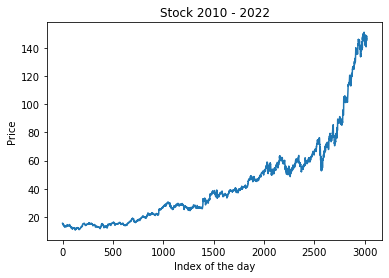

In [133]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('Index of the day')
ax1.set_ylabel('Price')
ax1.set_title('Stock 2010 - 2022')
ax1.plot('Index_of_the_day', 'Open', data = google)

### Smoothing the graph
* First I smoothed the graph by selecting only 1/100 of data (sampling th data set).

In [134]:
one_hundred = google.sample(frac = 0.1, random_state = np.random.randint(100))
one_hundred.head()

,High,Low,Open,Close,Adj Close,Index_of_the_day
Date,,,,,,
2012-05-02,15.145979,14.959179,14.973874,15.124809,15.124809,587
2012-02-06,15.213725,14.794795,14.819702,15.170388,15.170388,527
2020-06-04,71.947998,70.236504,71.519997,70.609001,70.609001,2622
2014-08-18,29.145481,28.721146,28.726631,29.028303,29.028303,1163
2014-09-18,29.396292,29.169914,29.269640,29.382830,29.382830,1185


In [135]:
one_hundred.index.name = None # deleting name of the index (Date)
one_hundred = one_hundred.sort_values(by='Index_of_the_day', ascending = True)
one_hundred.head()

,High,Low,Open,Close,Adj Close,Index_of_the_day
2010-01-14,14.799528,14.515841,14.542989,14.691184,14.691184,8
2010-01-25,13.695665,13.337757,13.613722,13.449588,13.449588,14
2010-01-26,13.688691,13.357184,13.399027,13.509862,13.509862,15
2010-01-27,13.640123,13.332775,13.481219,13.501892,13.501892,16
2010-01-29,13.474245,13.091181,13.411979,13.199027,13.199027,18


Text(0, 0.5, 'Price')

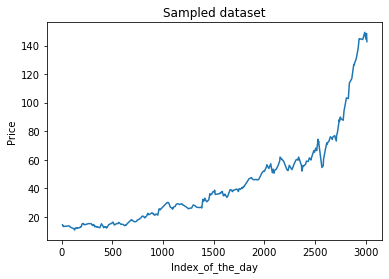

In [136]:
axes = one_hundred.plot('Index_of_the_day', 'Open', legend = False, title = 'Sampled dataset')
axes.set_ylabel('Price')

Text(0.5, 1.0, 'Sampled Plot')

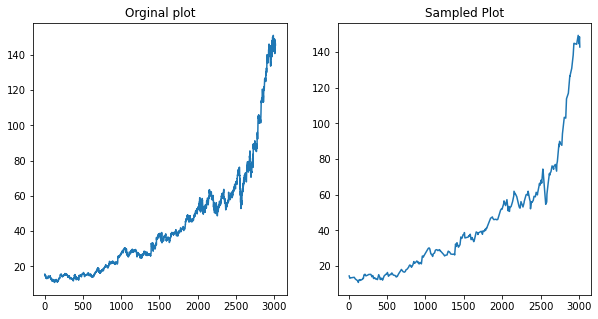

In [137]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axes[0].plot('Index_of_the_day', 'Open', data = google)
axes[0].set_title('Orginal plot')
axes[1].plot('Index_of_the_day', 'Open', data = one_hundred)
axes[1].set_title('Sampled Plot')

* as we can see sampling the data helped smooth the graph. However, I decided to smooth it even more to better fit a linear 
regression. To do this I used rolling mean 

In [138]:
google = google.reset_index() # adding index as new col
google.head()

,Date,High,Low,Open,Close,Adj Close,Index_of_the_day
0,2010-01-04,15.678981,15.547723,15.615220,15.610239,15.610239,0
1,2010-01-05,15.637387,15.480475,15.620949,15.541497,15.541497,1
2,2010-01-06,15.588072,15.102393,15.588072,15.149715,15.149715,2
3,2010-01-07,15.193053,14.760922,15.178109,14.797037,14.797037,3
4,2010-01-08,15.024933,14.672753,14.744733,14.994298,14.994298,4


* I am calculating mean value every 200 position and assigning mean value to position starting from 199 row. Before that row there are NaNs. In row 199 we have mean values from 0 - 199, in 200 row we have mean values from 1 - 200 etc.

In [139]:
google['Rolling_Mean'] = google['Open'].rolling(window = 200).mean() 
google.iloc[199]

Date                2010-10-18 00:00:00
High                          15.434398
Low                           14.957685
Open                          14.957685
Close                         15.385083
Adj Close                     15.385083
Index_of_the_day                    199
Rolling_Mean                  12.940028
Name: 199, dtype: object

* copmering all 3 charts. We can see how the degree of smoothing has improved

Text(0.5, 1.0, 'Smoothed Plot (Rolling_Mean)')

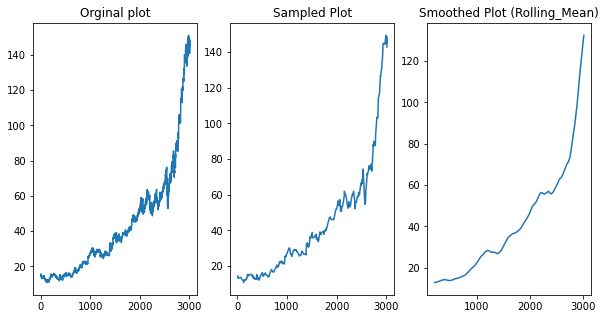

In [140]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))
axes[0].plot('Index_of_the_day', 'Open', data = google)
axes[0].set_title('Orginal plot')
axes[1].plot('Index_of_the_day', 'Open', data = one_hundred)
axes[1].set_title('Sampled Plot')
axes[2].plot('Index_of_the_day', 'Rolling_Mean', data = google)
axes[2].set_title('Smoothed Plot (Rolling_Mean)')

* here a superimposition of the original graph and the smoothed graph using rolling mean

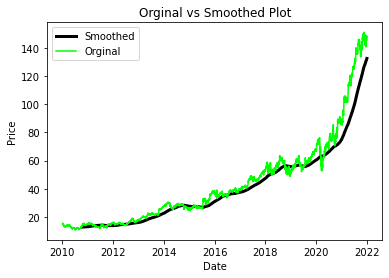

In [141]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(google['Date'], google['Rolling_Mean'], color = (0,0,0), linewidth = 3, label = 'Smoothed')
ax.plot(google['Date'], google['Open'], color = (0,1,0), label = 'Orginal')
ax.set_title('Orginal vs Smoothed Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')

### Linear regression - Predictions
Before running the regression, I trimmed the graph slightly.

In [142]:
filt_google = google[(google['Index_of_the_day'] >= 500) & (google['Index_of_the_day'] < 2000)]
filt_google.head()

,Date,High,Low,Open,Close,Adj Close,Index_of_the_day,Rolling_Mean
500,2011-12-27,16.052082,15.740999,15.742244,15.946479,15.946479,500,13.888971
501,2011-12-28,16.064785,15.892929,16.008745,15.932780,15.932780,501,13.899587
502,2011-12-29,16.014973,15.820700,15.977363,16.000029,16.000029,502,13.908738
503,2011-12-30,16.108622,15.990563,15.990563,16.087200,16.087200,503,13.918394
504,2012-01-03,16.641375,16.248346,16.262545,16.573130,16.573130,504,13.929391


In [143]:
from sklearn.linear_model import LinearRegression

* I performed linear regression using data obtained using rolling mean

In [144]:
model = LinearRegression().fit(filt_google[['Index_of_the_day']], filt_google[['Rolling_Mean']]) # columns in lists because we need DataFrame data type, not series
m = model.coef_[0]  # y = mx + b // coef_ calculates coefficient m
b = model.intercept_ # intercept_ calculates coefficient b
print('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.02 x +  1.57


In [145]:
type(filt_google[['Index_of_the_day']])

pandas.core.frame.DataFrame

In [146]:
predictions = model.predict(filt_google[['Index_of_the_day']])
predictions[0:10]

array([[11.91117387],
       [11.93185783],
       [11.95254179],
       [11.97322575],
       [11.99390971],
       [12.01459367],
       [12.03527762],
       [12.05596158],
       [12.07664554],
       [12.0973295 ]])

In [147]:
predictions = pd.DataFrame(data = predictions, index = filt_google.index.values, columns = ['Pred'])
predictions.head()

,Pred
500,11.911174
501,11.931858
502,11.952542
503,11.973226
504,11.993910


In [148]:
joined_df = filt_google.join(predictions, how = 'inner')
joined_df.head()

,Date,High,Low,Open,Close,Adj Close,Index_of_the_day,Rolling_Mean,Pred
500,2011-12-27,16.052082,15.740999,15.742244,15.946479,15.946479,500,13.888971,11.911174
501,2011-12-28,16.064785,15.892929,16.008745,15.932780,15.932780,501,13.899587,11.931858
502,2011-12-29,16.014973,15.820700,15.977363,16.000029,16.000029,502,13.908738,11.952542
503,2011-12-30,16.108622,15.990563,15.990563,16.087200,16.087200,503,13.918394,11.973226
504,2012-01-03,16.641375,16.248346,16.262545,16.573130,16.573130,504,13.929391,11.993910


* here we see how the values were fitted using linear regression

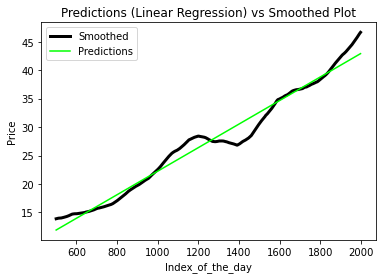

In [149]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(joined_df['Index_of_the_day'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 3, label = 'Smoothed')
ax.plot(joined_df['Index_of_the_day'], joined_df['Pred'], color = (0,1,0), label = 'Predictions')
ax.set_title('Predictions (Linear Regression) vs Smoothed Plot')
ax.set_xlabel('Index_of_the_day')
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')

* here r squared value. This value range from 0 to 1. The higher the better. 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained.

In [150]:
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'], joined_df['Pred'], multioutput = 'uniform_average')
r_squared

0.9720673502280623

* Next, I checked how the predicted values compare to future data not included in the regression parameter calculation

In [151]:
new_predictions = model.predict(google[['Index_of_the_day']])
new_predictions

array([[ 1.56919443],
       [ 1.58987839],
       [ 1.61056235],
       ...,
       [63.99338234],
       [64.0140663 ],
       [64.03475025]])

In [152]:
new_predictions = pd.DataFrame(data = new_predictions, index = google.index.values, columns = ['Pred'])
new_predictions.head()

,Pred
0,1.569194
1,1.589878
2,1.610562
3,1.631246
4,1.651930


In [153]:
new_joined_df = google.join(new_predictions, how = 'inner')
new_joined_df = new_joined_df.drop(new_joined_df.index[0:199]) # first 200 rows of rolling mean are NaNs
new_joined_df.head()

,Date,High,Low,Open,Close,Adj Close,Index_of_the_day,Rolling_Mean,Pred
199,2010-10-18,15.434398,14.957685,14.957685,15.385083,15.385083,199,12.940028,5.685302
200,2010-10-19,15.313103,15.015219,15.164410,15.139005,15.139005,200,12.937774,5.705986
201,2010-10-20,15.376864,15.130786,15.146726,15.142741,15.142741,201,12.935402,5.726670
202,2010-10-21,15.342493,15.093426,15.230662,15.242617,15.242617,202,12.933615,5.747354
203,2010-10-22,15.313103,15.194298,15.240873,15.256067,15.256067,203,12.933929,5.768038


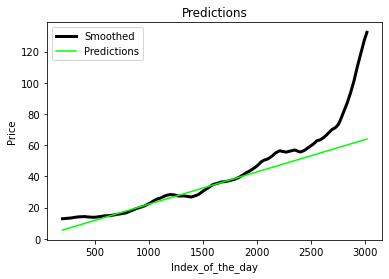

In [157]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(new_joined_df['Index_of_the_day'], new_joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 3, label = 'Smoothed')
ax.plot(new_joined_df['Index_of_the_day'], new_joined_df['Pred'], color = (0,1,0), label = 'Predictions')
ax.set_title('Predictions')
ax.set_xlabel('Index_of_the_day')
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')

* we can see that the actual values of the shares completely deviate from those predicted